# Neural net painter

This notebook demonstrates a fun experiment in training a neural network to do regression from the color (r,g,b) of a pixel in an image, given its (x,y) position in the image. It's mostly useless, but gives a nice visual intuition for regression. This notebook is inspired by the same example in [convnet.js](https://cs.stanford.edu/people/karpathy/convnetjs/demo/image_regression.html) and the first part of this notebook is mostly reimplementing it in Keras instead. Later, we'll have some fun interpolating different image models.

First make sure the following import statements work.

What type of data are they using?

it uses the r,g,b value of each pixel as well as its x,y position in the image


What conversions (if any) had to be done to the data before it could be put into the neural network?

it puts puts its x,y position into one array (x) and its r,g,b color into the other array (y). for the x,y position it transforms it into a 0-1 number by doing x/width and y/height. I am not exactly sure why they do this, but I am guessing that they might want to normalize all their position data to a similar scale for some reason.


What is the output of the neural network, both in terms of what it looks like to the computer (e.g. integers in the range [0-2]) and how humans should interpret it (e.g. what type of iris)?

The neural network outputs a predicted r,g,b color for each x,y position. It draws the image that it trains on or for the final part, draws a combination of the two images. It also shows the draw image


How many hidden layers does the network have, and what type are they (e.g. fully connected, convolutional, recurrent, LSTM, sparse, etc.)?

It has 7 hidden layers that are dense/fully connected. Its interesting that they had a problem with images that didn't require a convolutional network


What activation function(s) does it use?

It uses ReLU


What loss or cost function is it using?

its loss function was mean squared error


What kind of validation (if any) are they using?

They are using the training set as the validation set


What other validation methods might work for this type of problem?

I guess that they might have used a qualitative comparison between the input and output image which worked pretty well


Why do you think the authors may have chosen this architecture for their network?

They were trying to overfit so that they could draw the image so they use a fully connected network with 7 hidden layers and 20 neurons in each layer to try to accurately capture the image without the training taking a long time.

In [11]:
%matplotlib inline
import time
from PIL import Image
import numpy as np
import keras
from matplotlib.pyplot import imshow, figure
from keras.models import Sequential
from keras.layers import Dense

First we'll open an image, and create a helper function that converts that image into a training set of `(x,y)` positions (the data) and their corresponding `(r,g,b)` colors (the labels). We'll then load a picture with it.

data [[0.        0.       ]
 [0.0015625 0.       ]
 [0.003125  0.       ]
 ...
 [0.9953125 0.99875  ]
 [0.996875  0.99875  ]
 [0.9984375 0.99875  ]]
labels [[ 67  65  44]
 [ 67  65  44]
 [ 67  65  44]
 ...
 [151 136 133]
 [151 136 133]
 [151 136 133]]


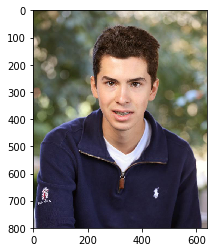

In [22]:
def get_data(img):
    width, height = img.size
    pixels = img.getdata()
    x_data, y_data = [],[]
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = pixels[idx]
            x_data.append([x / float(width), y / float(height)])
            y_data.append([r, g, b])
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    return x_data, y_data

im1 = Image.open("luca.jpg")
x1, y1 = get_data(im1)

print("data", x1)
print("labels", y1)
imshow(im1)

We've postfixed all the variable names with a `1` because later we'll open a second image.

We're now going to define a neural network which takes a 2-neuron input (the normalized x, y position) and outputs a 3-neuron output corresponding to color. We'll use Keras's `Sequential` class to create a deep neural network with a bunch of 20-neuron fully-connected layers with ReLU activations. Our loss function will be a mean_squared_error between the predicted colors and the actual ones from the image.

Once we've defined that model, we'll create a neural network `m1` with that architecture.

In [13]:
def make_model():
    model = Sequential()
    model.add(Dense(2, activation='relu', input_shape=(2,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(3))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

m1 = make_model()

Let's now go ahead and train our neural network. In this case, we are going to use the training set as the validation set as well. Normally, you'd never do this because it would cause your neural network to overfit. But in this experiment, we're not worried about overfitting... in fact, overfitting is the whole point! 

We train for 25 epochs and have a batch size of 5.

In [14]:
m1.fit(x1, y1, batch_size=5, epochs=25, verbose=1, validation_data=(x1, y1))

Train on 512000 samples, validate on 512000 samples
Epoch 1/25
512000/512000 [==============================] - 202s 395us/step - loss: 1695.4253 - val_loss: 922.0468
Epoch 2/25
512000/512000 [==============================] - 213s 416us/step - loss: 933.0975 - val_loss: 738.5168
Epoch 3/25
512000/512000 [==============================] - 206s 403us/step - loss: 793.1175 - val_loss: 908.1097
Epoch 4/25
512000/512000 [==============================] - 201s 393us/step - loss: 720.3547 - val_loss: 644.8732
Epoch 5/25
512000/512000 [==============================] - 209s 407us/step - loss: 666.5151 - val_loss: 518.8816
Epoch 6/25
512000/512000 [==============================] - 206s 403us/step - loss: 624.7234 - val_loss: 692.7307
Epoch 7/25
512000/512000 [==============================] - 204s 398us/step - loss: 598.6194 - val_loss: 518.7199
Epoch 8/25
512000/512000 [==============================] - 994s 2ms/step - loss: 574.2306 - val_loss: 585.6266
Epoch 9/25
512000/512000 [===========

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175080). Check your callbacks.
  % delta_t_median)


113250/512000 [=====>........................] - ETA: 9:56 - loss: 443.2680

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133461). Check your callbacks.
  % delta_t_median)


512000/512000 [==============================] - 376s 735us/step - loss: 449.1020 - val_loss: 513.9439
Epoch 25/25
512000/512000 [==============================] - 195s 380us/step - loss: 445.0331 - val_loss: 452.5641


Now that the neural net is finished training, let's take the training data, our pixel positions, and simply send them back straight through the network, and plot the predicted colors on a new image. We'll make a new function for this called `generate_image`. 

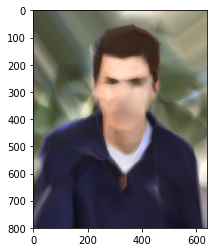

In [19]:
def generate_image(model, x, width, height):
    img = Image.new("RGB", [width, height])
    pixels = img.load()
    y_pred = model.predict(x)
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = y_pred[idx]
            pixels[x, y] = (int(r), int(g), int(b))
    return img

img = generate_image(m1, x1, im1.width, im1.height)
imshow(img)

Sort of looks like the original image a bit! Of course the network can't learn the mapping perfectly without pretty much memorizing the data, but this way gives us a pretty good impression and doubles as an extremely inefficient form of compression!

Let's load another image. We'll load the second image and also resize it so that it's the same size as the first image.

data [[0.        0.       ]
 [0.0015625 0.       ]
 [0.003125  0.       ]
 ...
 [0.9953125 0.99875  ]
 [0.996875  0.99875  ]
 [0.9984375 0.99875  ]]
labels [[ 58  86  45]
 [ 58  86  45]
 [ 58  86  45]
 ...
 [171  26  41]
 [165  20  35]
 [159  14  29]]


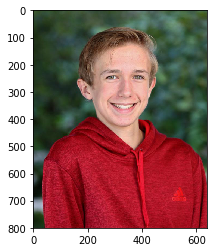

In [20]:
im2 = Image.open("josh.jpg")
im2 = im2.resize(im1.size)
x2, y2 = get_data(im2)

print("data", x2)
print("labels", y2)
imshow(im2)

Now we'll repeat the experiment from before. We'll make a new neural network `m2` which will learn to map `im2`'s (x,y) positions to its (r,g,b) colors.

In [21]:
m2 = make_model()   # make a new model, keep m1 separate
m2.fit(x2, y2, batch_size=5, epochs=25, verbose=1, validation_data=(x2, y2))

Train on 512000 samples, validate on 512000 samples
Epoch 1/25
512000/512000 [==============================] - 188s 367us/step - loss: 881.6851 - val_loss: 492.8029
Epoch 2/25
512000/512000 [==============================] - 196s 383us/step - loss: 411.8476 - val_loss: 455.5995
Epoch 3/25
512000/512000 [==============================] - 184s 359us/step - loss: 371.7854 - val_loss: 364.7653
Epoch 4/25
512000/512000 [==============================] - 189s 368us/step - loss: 345.0313 - val_loss: 332.8307
Epoch 5/25
512000/512000 [==============================] - 186s 363us/step - loss: 324.8538 - val_loss: 391.0096
Epoch 6/25
512000/512000 [==============================] - 183s 357us/step - loss: 309.4992 - val_loss: 277.3360
Epoch 7/25
512000/512000 [==============================] - 184s 359us/step - loss: 294.9091 - val_loss: 287.3042
Epoch 8/25
512000/512000 [==============================] - 187s 365us/step - loss: 284.2823 - val_loss: 318.9517
Epoch 9/25
512000/512000 [==========

Let's generate a new image from `m2` and see how it looks.

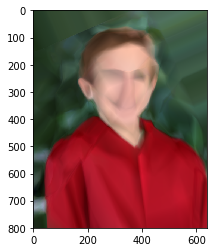

In [23]:
img = generate_image(m2, x2, im2.width, im2.height)
imshow(img)

Not too bad!

Now let's do something funky. We're going to make a new neural network, `m3`, with the same architecture as `m1` and `m2` but instead of training it, we'll just set its weights to be interpolations between the weights of `m1` and `m2` and at each step, we'll generate a new image. In other words, we'll gradually change the model learned from the first image into the model learned from the second image, and see what kind of an image it outputs at each step.

To help us do this, we'll create a function `get_interpolated_weights` and we'll make one change to our image generation function: instead of just coloring the pixels to be the exact outputs, we'll auto-normalize every frame by rescaling the minimum and maximum output color to 0 to 255. This is because sometimes the intermediate models output in different ranges than what `m1` and `m2` were trained to. Yeah, this is a bit of a hack, but it works!

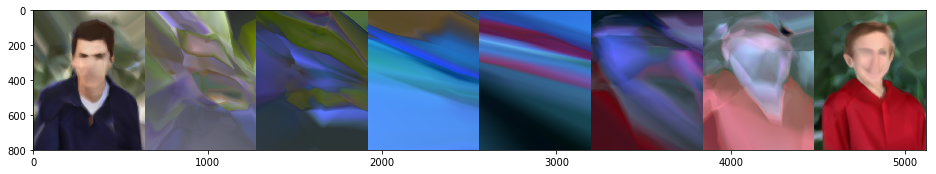

In [24]:
def get_interpolated_weights(model1, model2, amt):
    w1 = np.array(model1.get_weights())
    w2 = np.array(model2.get_weights())
    w3 = np.add((1.0 - amt) * w1, amt * w2)
    return w3

def generate_image_rescaled(model, x, width, height):
    img = Image.new("RGB", [width, height])
    pixels = img.load()
    y_pred = model.predict(x)
    y_pred = 255.0 * (y_pred - np.min(y_pred)) / (np.max(y_pred) - np.min(y_pred))  # rescale y_pred
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = y_pred[idx]
            pixels[x, y] = (int(r), int(g), int(b))
    return img


# make new model to hold interpolated weights
m3 = make_model()

# we'll do 8 frames and stitch the images together at the end
n = 8
interpolated_images = []
for i in range(n):
    amt = float(i)/(n-1.0)
    w3 = get_interpolated_weights(m1, m2, amt)
    m3.set_weights(w3)
    img = generate_image_rescaled(m3, x1, im1.width, im1.height)
    interpolated_images.append(img)

full_image = np.concatenate(interpolated_images, axis=1)
figure(figsize=(16,4))
imshow(full_image)

Neat... Let's do one last thing, and make an animation with more frames. We'll generate 120 frames inside the assets folder, then use `ffmpeg` to stitch them into an mp4 file. If you don't have ffmpeg, you can install it from [here](https://ffmpeg.org/).

In [ ]:
n = 120
frames_dir = '../assets/neural-painter-frames'
video_path = '../assets/neural-painter-interpolation.mp4'

import os
if not os.path.isdir(frames_dir):
    os.makedirs(frames_dir)

for i in range(n):
    amt = float(i)/(n-1.0)
    w3 = get_interpolated_weights(m1, m2, amt)
    m3.set_weights(w3)
    img = generate_image_rescaled(m3, x1, im1.width, im1.height)
    img.save('../assets/neural-painter-frames/frame%04d.png'%i)

cmd = 'ffmpeg -i %s/frame%%04d.png -c:v libx264 -pix_fmt yuv420p %s' % (frames_dir, video_path)
os.system(cmd)

You can find the video now in the assets directory. Looks neat! We can also display it in this notebook. From here, there's a lot of fun things we can do... Triangulating between multiple images, or streaming together several interpolations, or predicting color from not just position, but time in a movie. Lots of possibilities. 

![dogcat](../assets/dog-cat-interp.gif)

In [ ]:
from IPython.display import HTML
import io
import base64

video = io.open(video_path, 'r+b').read()
encoded = base64.b64encode(video)

HTML(data='''<video alt="test" controls>
     <source src="data:video/mp4;base64,{0}" type="video/mp4" />
     </video>'''.format(encoded.decode('ascii')))